<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [3]:
dados = pd.read_csv('DMV_Written_Tests.csv')

In [4]:
dados.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
DMV_Test_1    100 non-null float64
DMV_Test_2    100 non-null float64
Results       100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [6]:
scores = dados[['DMV_Test_1', 'DMV_Test_2']].values
results = dados['Results'].values

### Task 3: Visualize the Data
---

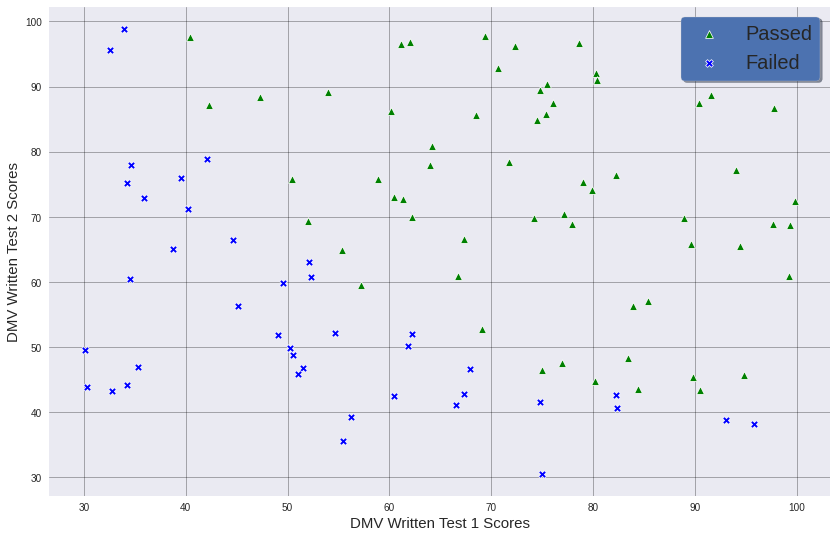

In [7]:
plt.figure(figsize = (14,9))

passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:,0], 0], 
                    y = scores[passed[:,0], 1], 
                    marker = '^',
                    color = 'g',
                    s = 60)

sns.scatterplot(x = scores[failed[:,0], 0],
                y = scores[failed[:,0], 1], 
                marker = 'X',
                color = 'b',
                s = 60)

ax.set_xlabel('DMV Written Test 1 Scores', fontsize = 15)
ax.set_ylabel('DMV Written Test 2 Scores', fontsize = 15)
ax.legend(['Passed', 'Failed'], fontsize = 20, framealpha = 1, frameon = True,\
          shadow=True).get_frame().set_facecolor('C0')
plt.grid(color = 'black', alpha = 0.3)
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [8]:
def LogisticFuction(x):
    return 1/(1 + np.exp(-x))

In [9]:
LogisticFuction(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [10]:
def ComputeCost(theta, x, y):
    m = len(y)
    yPred = LogisticFuction(np.dot(x, theta))
    error = (y*np.log(yPred)) + (1 - y)*np.log(1 - yPred)
    cost  = -1/m*sum(error)
    gradient = 1/m*np.dot(x.transpose(), (yPred - y))
    return cost[0], gradient

### Task 6: Cost and Gradient at Initialization
---

In [11]:
meanScores = np.mean(scores, axis = 0)
stdScores  = np.std(scores, axis = 0)
scores = (scores - meanScores)/stdScores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis = 1)
y = results.reshape(rows, 1)

thetaInit = np.zeros((cols + 1, 1))
cost, gradient = ComputeCost(thetaInit, X, y)

print('Cost at initialization:', cost)
print('Gradient at inicialization:', gradient)

Cost at initialization: 0.693147180559946
Gradient at inicialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [12]:
def GradientDescent(x, y, theta, alpha, iteractions):
    costs = []
    for i in range(iteractions):
        cost, gradient = ComputeCost(theta, x, y)
        theta -= (alpha*gradient)
        costs.append(cost)
    return theta, costs

In [13]:
theta, costs = GradientDescent(X, y, thetaInit, 1, 200)

In [14]:
print('Theta after reunning gradient descent:', theta)
print('Resulting cost:', costs[-1])

Theta after reunning gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.2048938203512014


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

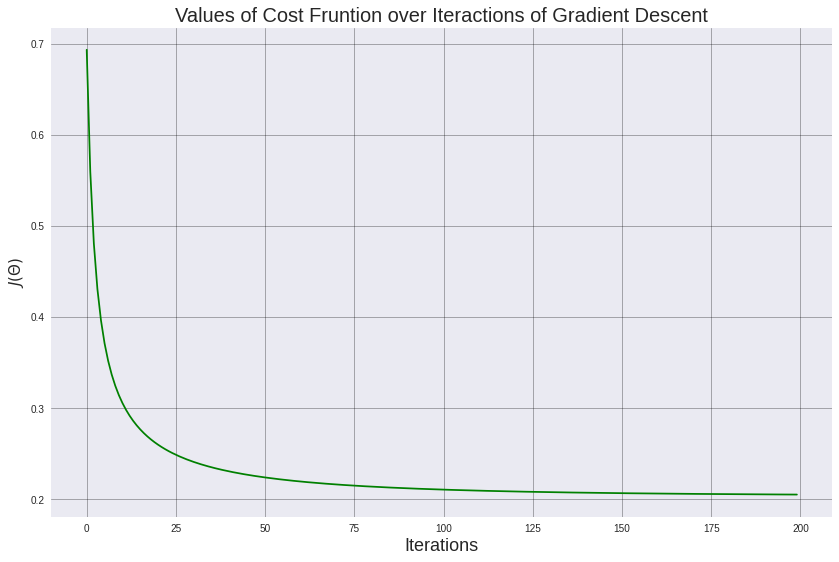

In [15]:
plt.figure(figsize = (14, 9))
plt.plot(costs, 'g')
plt.grid(color = 'black', alpha = 0.3)
plt.xlabel('Iterations', fontsize = 18)
plt.ylabel('$J(\Theta)$', fontsize = 15)
plt.title('Values of Cost Fruntion over Iteractions of Gradient Descent', fontsize = 20)
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

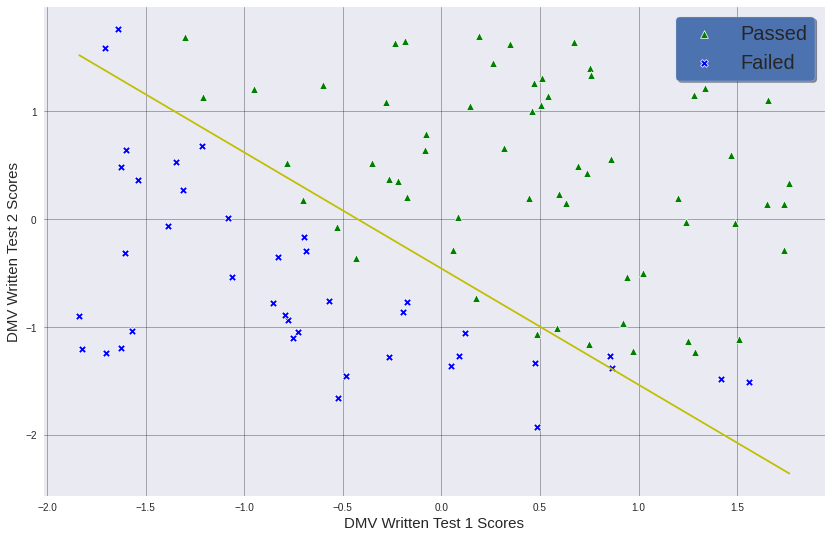

In [16]:
plt.figure(figsize = (14,9))

ax = sns.scatterplot(x = X[passed[:,0], 1], 
                    y = X[passed[:,0], 2], 
                    marker = '^',
                    color = 'g',
                    s = 60)

sns.scatterplot(x = X[failed[:,0], 1],
                y = X[failed[:,0], 2], 
                marker = 'X',
                color = 'b',
                s = 60)

ax.set_xlabel('DMV Written Test 1 Scores', fontsize = 15)
ax.set_ylabel('DMV Written Test 2 Scores', fontsize = 15)
ax.legend(['Passed', 'Failed'], fontsize = 20, framealpha = 1, frameon = True,\
          shadow=True).get_frame().set_facecolor('C0')

xBoundary = np.array([np.min(X[:,1]), np.max(X[:,1])])
yBoundary = -(theta[0] + theta[1]*xBoundary)/theta[2]

sns.lineplot(x = xBoundary, y = yBoundary, color = 'y')
plt.grid(color = 'black', alpha = 0.3)
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [17]:
def Predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [18]:
p = Predict(theta, X)
print('Training Accuracy:', sum(p == y)[0],'%')

Training Accuracy: 89 %


In [20]:
test = np.array([59, 79])
test = (test - meanScores)/stdScores
test = np.append(np.ones(1), test)
probability = LogisticFuction(test.dot(theta))
print('A person who scores 50 and 79 on their DMW written tests have a', np.round(probability[0], 2),\
      'probability  of passing.')

A person who scores 50 and 79 on their DMW written tests have a 0.93 probability  of passing.
